   ## Automobile Data Set
   
   #### This dataset contains information about cars and their performance across 3 continents 

## Exploration Ideas

   ##### 1. Loading and Cleaning the Data 
   ##### 2. Variable analysis to see its impact on Automobile Pricing 
   ##### 3. Summary statistics of different variables 
   ##### 4. Univariate and Bi-variate analysis with Visualization
   ##### 5. Make, Curb-weight, Drive wheels analysis
   ##### 6. Findings and Conclusion

**Step.1 Importing the required libraries**

In [1]:
#Data manipulation libraries

import numpy as np
import pandas as pd


**Step.2 Reading the Csv data file from a local file path and assigning it to a Variable using pandas library as pd**

In [2]:
automobile = pd.read_csv('C:/Users/RAVI/Favorites/Downloads/sample_ds/automobile_data.csv')

**Step.3 Displaying first few lines of our data using a simple command**

In [3]:
automobile.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


Comment: By looking at the above output of first five rows of our dataset 
1.we can observe our data has some missing values in the normalized-losses column 
2.we have 26 columns in total we need to have a good grasp of these columns values and any relationship amongst each other 

**Step.4 Using one of the important pandas library, Displaying the full report of our Data**

In [4]:
import pandas_profiling 

In [5]:
pandas_profiling.ProfileReport(automobile) # creates full data profile report as output

# The following 2 lines of code creates the full data profile report at the "given location" in html format

#report = pandas_profiling.ProfileReport(automobile)
#report.to_file("automobile_data.html")


Number of variables,26
Number of observations,205
Total Missing (%),0.0%
Total size in memory,28.9 KiB
Average record size in memory,144.2 B
Numeric,9
Categorical,16
Boolean,0
Date,0
Text (Unique),0
Rejected,1


Comments: We should be having good grasp of all of our dataset using the above detailed report for each and every variable

Below are some important points to bear in mind and start cleansing the data 

- highway-mpg is highly correlated with city-mpg (ρ = 0.97134) Rejected
- horsepower has a high cardinality: 60 distinct values Warning
- normalized-losses has a high cardinality: 52 distinct values Warning
- price has a high cardinality: 187 distinct values Warning
- symboling has 67 / 32.7% zeros Zeros


**Step.5 Getting all data types of the Dataset (Columns data types)**

In [6]:
automobile.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

**Step.6 Using one of the important command, get all statistics of our data set **

In [7]:
automobile.describe()    # as we can see mean, standard deviation and other values from the below 

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


**Step.7 Checking the data to find out if there are null fields exists and Clean it**

In [8]:
automobile.isnull().sum()  #Looks like there isn't any null fields exists

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

**Step.8 Cleaning the normalized losses field, because we have some '?' symbols in our first glance **

In [9]:
# Find out number of records having '?' value for normalized losses, we can use any one of the below 2 lines of code

automobile[automobile['normalized-losses']=='?'].count() # we have 41


symboling            41
normalized-losses    41
make                 41
fuel-type            41
aspiration           41
num-of-doors         41
body-style           41
drive-wheels         41
engine-location      41
wheel-base           41
length               41
width                41
height               41
curb-weight          41
engine-type          41
num-of-cylinders     41
engine-size          41
fuel-system          41
bore                 41
stroke               41
compression-ratio    41
horsepower           41
peak-rpm             41
city-mpg             41
highway-mpg          41
price                41
dtype: int64

In [10]:
automobile['normalized-losses'].loc[automobile['normalized-losses'] == '?'].count()  

41

**Step.9 Setting the missing value to mean of normalized losses and convert the datatype to integer**

In [11]:
n1 = automobile['normalized-losses'].loc[automobile['normalized-losses'] != '?']
nlmean = n1.astype(str).astype(int).mean()
automobile['normalized-losses'] = automobile['normalized-losses'].replace('?',nlmean).astype(int)
automobile['normalized-losses'].head()


0    122
1    122
2    122
3    164
4    164
Name: normalized-losses, dtype: int32

** Step.10 Cleaning the price Data**

In [12]:
#Find out the number of values which are not numeric in the price column

automobile['price'].str.isnumeric().value_counts() # we have 201 numbers and 4 are not

True     201
False      4
Name: price, dtype: int64

In [13]:
# List out the values which are not numeric in the price column

automobile['price'].loc[automobile['price'].str.isnumeric() == False] 

9      ?
44     ?
45     ?
129    ?
Name: price, dtype: object

In [105]:
# Setting the missing value to mean of price and convert the datatype to integer

price = automobile['price'].loc[automobile['price'] != '?']
pmean = price.astype(str).astype(int).mean()
automobile['price'] = automobile['price'].replace('?',pmean).astype(int)
automobile['price'].head()

0    13495
1    16500
2    16500
3    13950
4    17450
Name: price, dtype: int32

**Step.11 Cleaning the Horse power column**

In [14]:
# Find out the number of horse power values which are not numeric

automobile['horsepower'].str.isnumeric().value_counts()

True     203
False      2
Name: horsepower, dtype: int64

In [15]:
#List out the values which are not numeric

automobile['horsepower'].loc[automobile['horsepower'].str.isnumeric() == False]

130    ?
131    ?
Name: horsepower, dtype: object

In [16]:
# Checking the numeric and replacing with mean value and convert the datatype to integer

automobile['horsepower'].str.isnumeric().value_counts()
horsepower = automobile['horsepower'].loc[automobile['horsepower'] != '?']
hpmean = horsepower.astype(str).astype(int).mean()
automobile['horsepower'] = automobile['horsepower'].replace('?',hpmean).astype(int)

In [17]:
#Checking the outlier of horsepower

automobile.loc[automobile['horsepower'] > 10000]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


In [18]:
#Excluding the outlier data for horsepower

automobile[np.abs(automobile.horsepower-automobile.horsepower.mean())<=(3*automobile.horsepower.std())]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.00,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.00,115,5500,18,22,17450
5,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.50,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.50,110,5500,19,25,17710
7,1,122,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.50,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.30,140,5500,17,20,23875
9,0,122,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.4,7.00,160,5500,16,22,?


**Step 12. Cleaning the bore column**

In [19]:
#Find out the number of invalid values
automobile.isnull().sum()
#automobile['bore'].loc[automobile['bore'] == '?']

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [20]:
# Replace the non-numeric value to null and convert the datatype

automobile['bore'] = pd.to_numeric(automobile['bore'],errors='coerce')
automobile.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke                object
compression-ratio    float64
horsepower             int32
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [131]:
# To find out any missing values or special symbols exists in the core column  

automobile['bore'].loc[automobile['bore'] == '?']
automobile = automobile[automobile['bore'] != '?']


TypeError: invalid type comparison

**Step13.Cleaning the stroke column**

In [21]:
#Remove the records which are having the value '?'

#Replace the non-number value to null and convert the datatype 

automobile['stroke'] = pd.to_numeric(automobile['stroke'],errors='coerce')
automobile.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int32
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

**Step14.Cleaning the peak rpm data column**

In [22]:
#Convert the non-numeric data to null and convert the datatype 

automobile['peak-rpm'] = pd.to_numeric(automobile['peak-rpm'],errors='coerce')
automobile.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int32
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

**Step15.Cleaning the number of doors data column**

In [23]:
#remove the records which are having the value '?'

automobile['num-of-doors'].loc[automobile['num-of-doors'] == '?']
automobile = automobile[automobile['num-of-doors'] != '?']
automobile['num-of-doors'].loc[automobile['num-of-doors'] == '?']# has no values 

Series([], Name: num-of-doors, dtype: object)

In [24]:
automobile.isnull().sum() # Now we have 3 columns with NaN's

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             2
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [25]:
pd.set_option('display.max_columns', None) # This will display all the columns.
automobile.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450


**Performing Univariate Analysis**

In [28]:
#importing visualization libraries 
 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

#plotting defaults
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore') #if there are warnings this statement ignores it

**vehicle make frequency diagram**

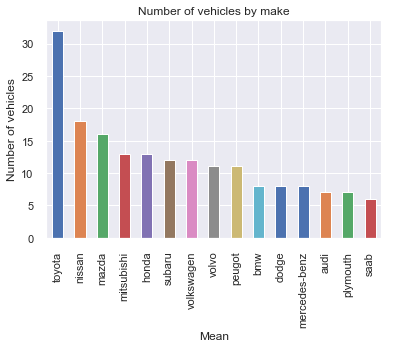

In [29]:
automobile.make.value_counts().nlargest(15).plot(kind='bar') # i have taken only 15 cars 
figsize=(18,7)
plt.title("Number of vehicles by make")
plt.ylabel('Number of vehicles')
plt.xlabel('Mean');

From the above plot, Toyota has bigger tower which is first one has 35% and second place is of 18 % Nissan 

**Insurance risk ratings Histogram**

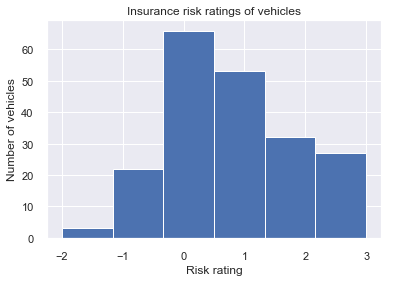

In [30]:
automobile.symboling.hist(bins=6)
plt.title("Insurance risk ratings of vehicles")
plt.ylabel('Number of vehicles')
plt.xlabel('Risk rating');

Symboling or the insurance risk rating have the ratings between -3 and 3, however for our dataset it starts from -2. There are more cars in the range of 0 and 1.

**Normalized losses Histogram**

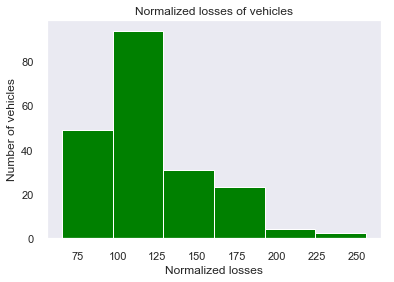

In [31]:

automobile['normalized-losses'].hist(bins=6,color='Green', grid=False) # false removes the grid lines
plt.title("Normalized losses of vehicles")
plt.ylabel('Number of vehicles')
plt.xlabel('Normalized losses');


Normalized losses which is the average loss payment per insured vehicle has more number of cars in the range between 65 and 210.

**Fuel type - Bar Graph **

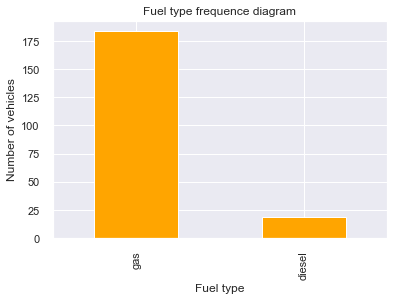

In [32]:

automobile['fuel-type'].value_counts().plot(kind='bar',color='orange')
plt.title("Fuel type frequence diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Fuel type');


we can see there are more number of **gas** type vehicles than **Diesel**.

**Fuel type Pie Diagram**

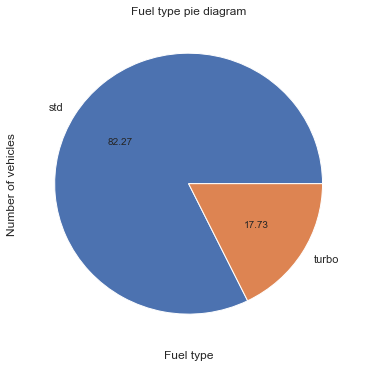

In [33]:

automobile['aspiration'].value_counts().plot.pie(figsize=(6, 6), autopct='%.2f')
plt.title("Fuel type pie diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Fuel type');


Most preferred fuel type for the customer is standard vs turbo having more than 80% of the share.

**Horse Power Histogram**

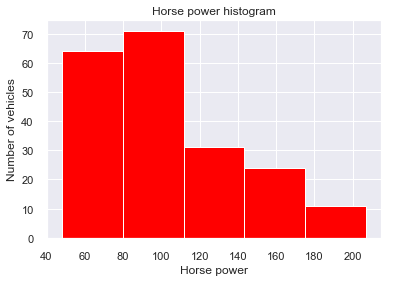

In [34]:

automobile.horsepower[np.abs(automobile.horsepower-automobile.horsepower.mean())<=(3*automobile.horsepower.std())].hist(bins=5,color='red');
plt.title("Horse power histogram")
plt.ylabel('Number of vehicles')
plt.xlabel('Horse power');


Here we are taking standard deviation of horse power as there are some outliers present in the horsepower data

**Curb Weight Histogram**

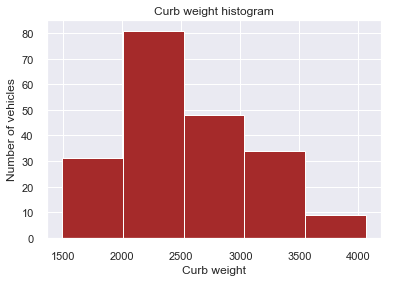

In [35]:

automobile['curb-weight'].hist(bins=5,color='brown');
plt.title("Curb weight histogram")
plt.ylabel('Number of vehicles')
plt.xlabel('Curb weight');


Curb weight of the cars are distributed between 1500 and 4000 approximately.

**Drive wheels BarChart **

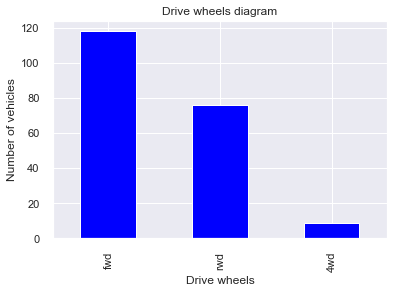

In [36]:

automobile['drive-wheels'].value_counts().plot(kind='bar',color='blue')
plt.title("Drive wheels diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Drive wheels');


From above plot, front wheel drive has most number of cars followed by rear wheel and four wheel. Four wheel has very less number of cars.

**Number of Doors of vehicle BarChart **

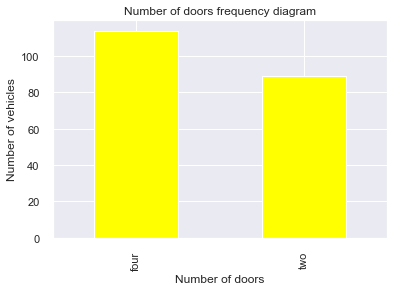

In [37]:

automobile['num-of-doors'].value_counts().plot(kind='bar',color='yellow')
plt.title("Number of doors frequency diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Number of doors');


**No of Cylinders Bar Graph**

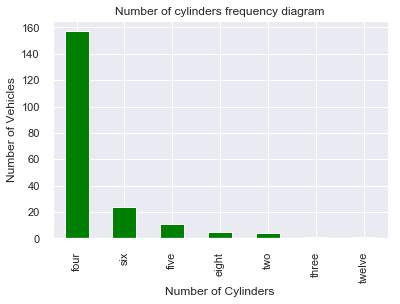

In [38]:
automobile['num-of-cylinders'].value_counts().plot(kind='bar',color='green')
plt.title("Number of cylinders frequency diagram")
plt.ylabel('Number of Vehicles')
plt.xlabel('Number of Cylinders');

Almost 160 cars have 4 cylinders which is more than 75%.

**Body Style Bar Graph**

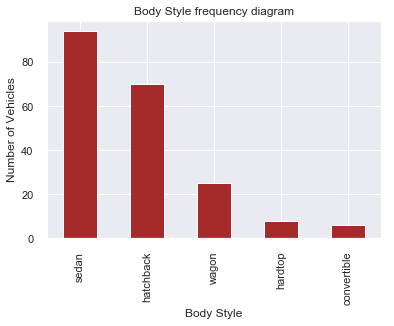

In [39]:

automobile['body-style'].value_counts().plot(kind='bar',color='brown')
plt.title("Body Style frequency diagram")
plt.ylabel('Number of Vehicles')
plt.xlabel('Body Style');


Sedan and Hutchback constitues to more than 60% in the body style feature.

**Findings**

We have taken some key features of the automobile dataset for this analysis and below are our findings.

1. Toyota is the make of the car which has most number of vehicles with 40% and with 2nd highest is Nissan
2. Most preferred fuel type for the customer is standard having more than 80% of the choice compared to Turbo which is around 18
3. For drive wheels, front wheel drive has most number of cars followed by rear wheel and four wheel. There are very less number of cars for four wheel drive.
4. Curb weight of the cars are distributed between 1500 and 4000 approximately
5. Symboling or the insurance risk rating have the ratings between -3 and 3 however for our dataset it starts from -2. There are more cars in the range of 0 and 1.
6. Normalized losses which is the average loss payment per insured vehicle year is has more number of cars in the range between 65 and 150.

**Correlation Analysis with Heat Map**

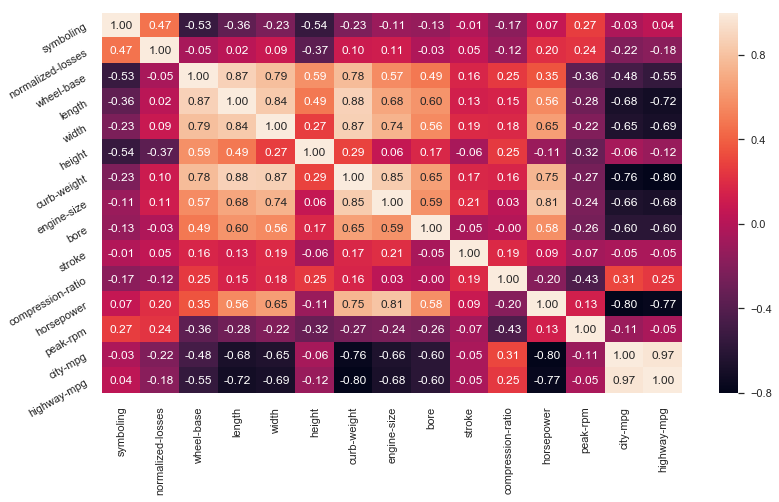

In [40]:
# Show Time now, Lets check out data is warm or cold with Heatmap

import seaborn as sns
corr = automobile.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
a = sns.heatmap(corr, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

Findings: There are some good inferences we can take it from the above correlation heat map.

1. Price is more correlated with engine size and curb weight of the car(Bigger the engine size --> higher the price)
2. Curb weight is mostly correlated with engine size, length, width and wheel base which is expected as these adds up the weight of the car
3. Wheel base is highly correlated with length and width of the car(Bigger the car --> wheels also can be bigger in size)
4. Symboling and normalized car are correlated than the other fields

**Bivariate Analysis**


 - Boxplot of Price and Make of the car

In [48]:
#plt.rcParams['figure.figsize']=(22,9)
#sns.boxplot(data=automobile,x='make', y='price');

from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
ax = sns.boxplot(x="make", y="price", data=automobile)

ValueError: Neither the `x` nor `y` variable appears to be numeric.

<Figure size 1080x576 with 0 Axes>

*Findings: Below are our findings on the make and price of the car*  from above box plot

1. The most expensive car is manufacture by Mercedes benz and the least expensive is Chevrolet

2. The premium cars costing more than 20000 are BMW, Jaquar, Mercedes benz and Porsche

3. Less expensive cars costing less than 10000 are Chevrolet, Dodge, Honda, Mitsubishi, Plymoth and Subaru

4. Rest of the cars are in the midrange between 10000 and 20000 which has the highest number of cars

**Scatter plot of price and engine size **

AttributeError: 'str' object has no attribute 'conjugate'

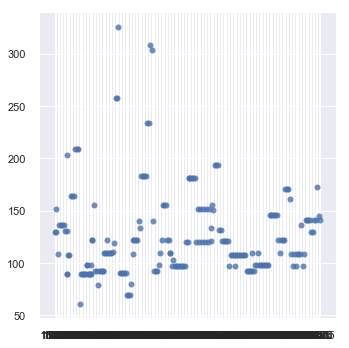

In [44]:
g = sns.lmplot('price',"engine-size", automobile);

Findings: Engine size of the car is Directly proportional to Price of the Car 

** Scatter plot of normalized losses and symboling **

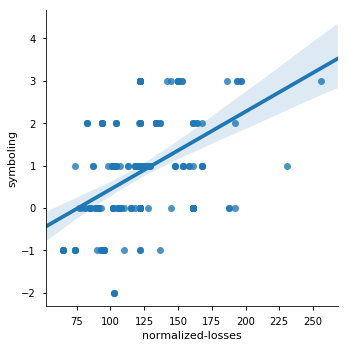

In [56]:
g = sns.lmplot('normalized-losses',"symboling", automobile);

Findings: 

1. From the scattered plot, it's very evident that the lesser the rating lesser the normalized loss.

2. It looks like the negative ratings are better for the car which has lesser losses.


**Scatter plot of Engine size and Peak RPM**

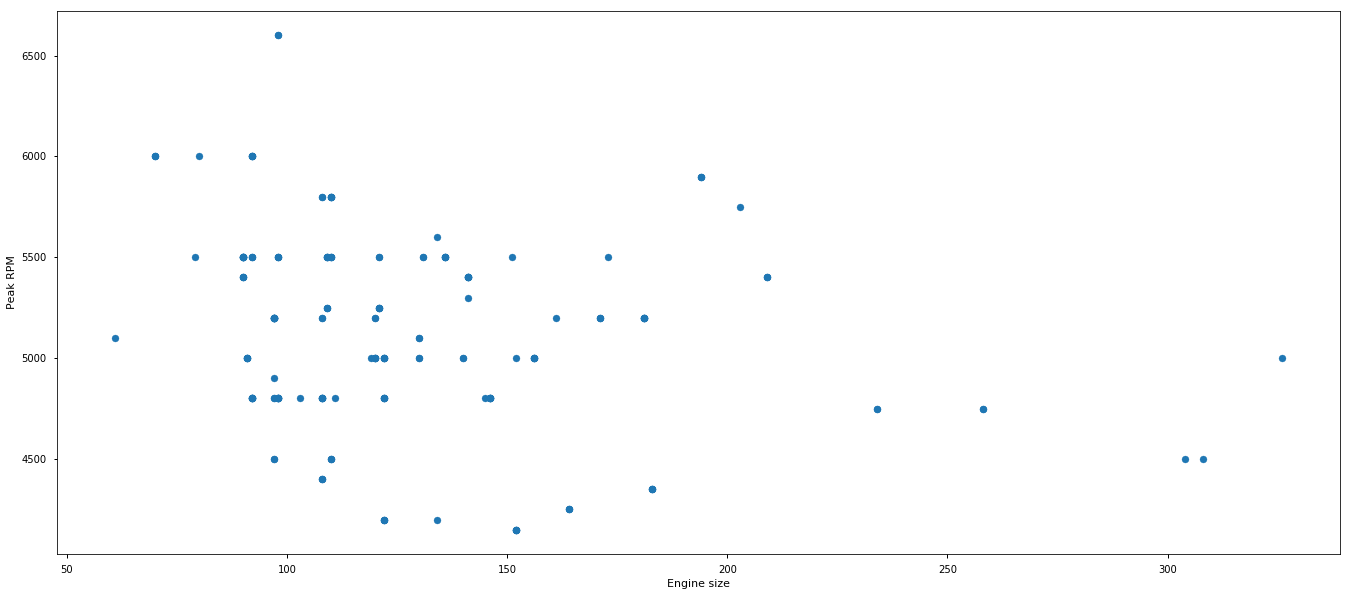

In [57]:

plt.scatter(automobile['engine-size'],automobile['peak-rpm'])
plt.xlabel('Engine size')
plt.ylabel('Peak RPM');

**Scatter plot of City and Highway MPG, Curb weight based on Make of the car**

Based on the Scatter plot and the provided dataset, it is clear that for both city and highway mileage of the automobile is inversely proportional(i.e is more than engine size - less the MPG it gives.) to the curb weight 

Heavier the Vehicle, Less is the Mileage for both City and Highway


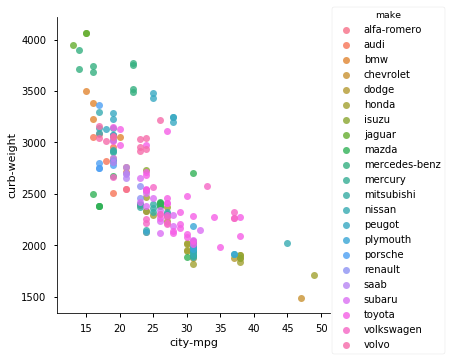

In [58]:

g = sns.lmplot('city-mpg', "curb-weight",automobile, hue= "make", fit_reg=False);

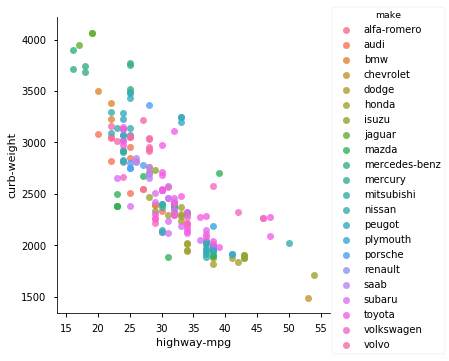

In [59]:
g = sns.lmplot('highway-mpg', "curb-weight", automobile, hue="make",fit_reg=False);

Again from above plot, we can observe that heavier the curb weight - less mileage (both for city and highway)

** Drive Wheels and City MPG BarChart **

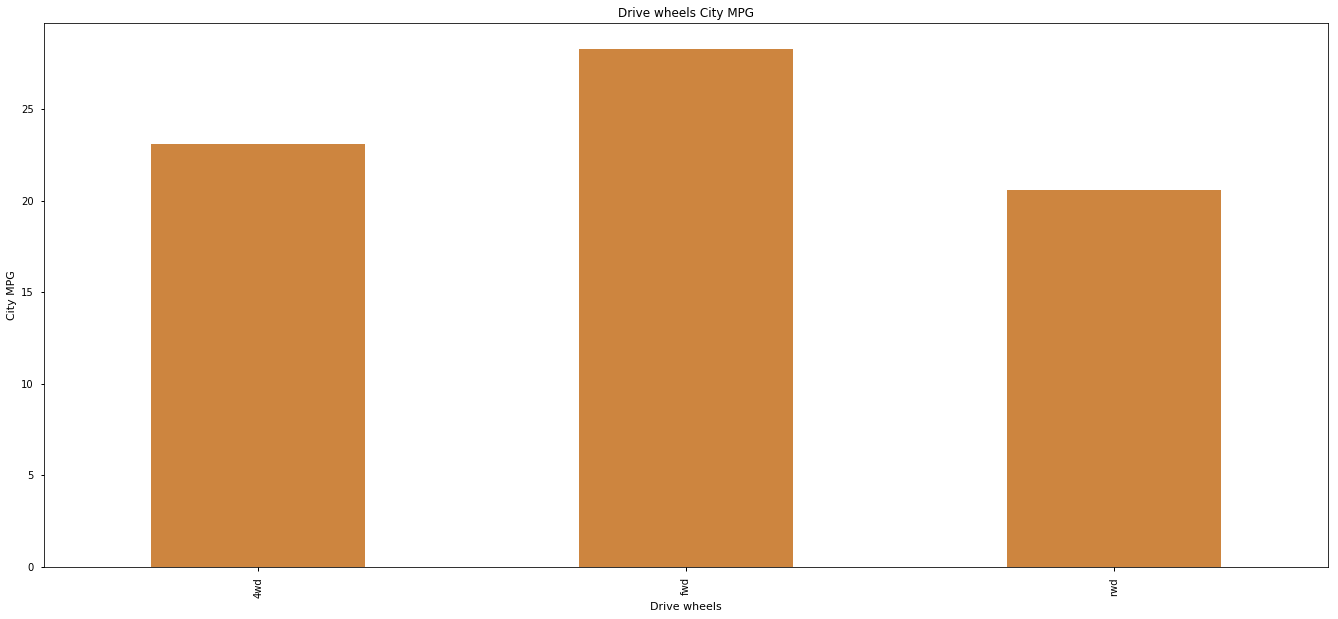

In [60]:

automobile.groupby('drive-wheels')['city-mpg'].mean().plot(kind='bar', color = 'peru');
plt.title("Drive wheels City MPG")
plt.ylabel('City MPG')
plt.xlabel('Drive wheels');


Above plot gives the city mpg for different drive wheels

Boxplot of Drive wheels and Price :

Findings: It's very evident that the Rear wheel drive cars are most expensive and front wheel is least expensive cars.

Four wheel drive cars are little higher than the front wheel drive cars. 

There is very less number of four wheel drive cars in our dataset so this picture might not be very accurate.

**Drive Wheels and Highway MPG Barchart**

Text(0.5,0,'Drive wheels')

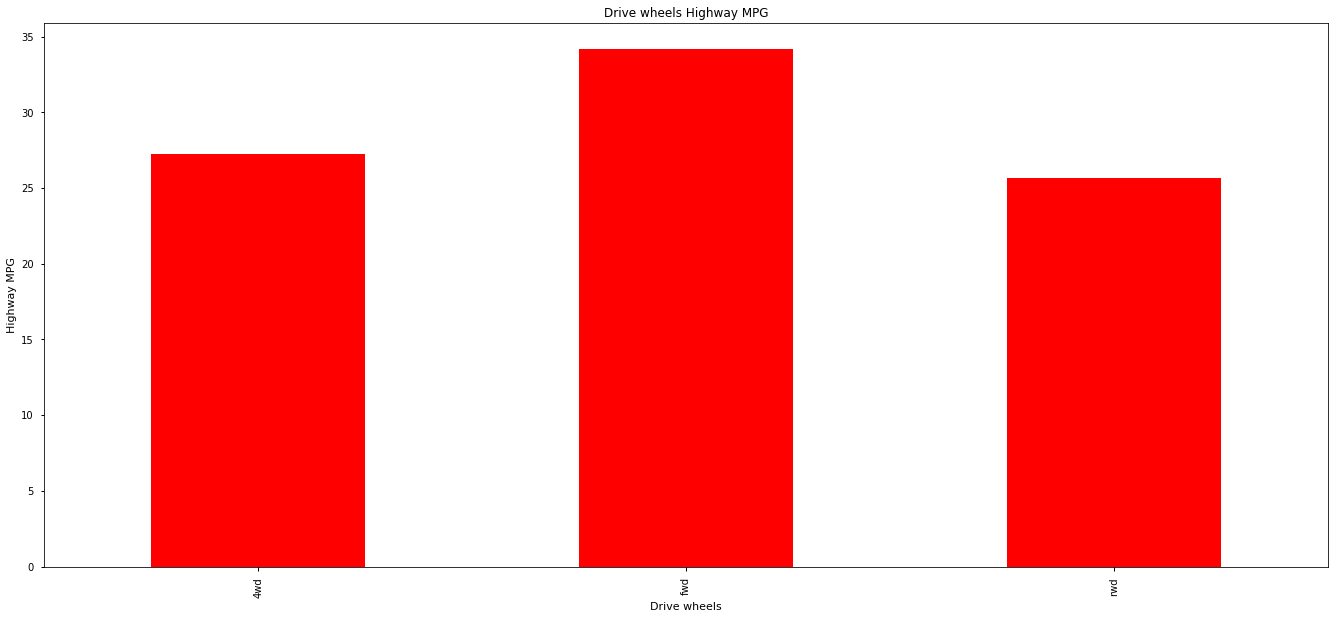

In [62]:

automobile.groupby('drive-wheels')['highway-mpg'].mean().plot(kind='bar', color = 'red');
plt.title("Drive wheels Highway MPG")
plt.ylabel('Highway MPG')
plt.xlabel('Drive wheels')

**Boxplot of Drive wheels and Price**

Findings: 
1. It's very evident that the Rear wheel drive cars are most expensive and Front wheel is least expensive cars.

2. The Price for the Four wheel drive cars are little higher than the Front wheel drive cars. 

3. There is very less number of four wheel drive cars in our dataset so this picture might not be very accurate.


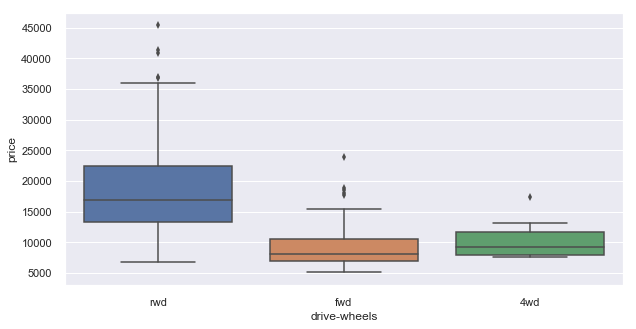

In [79]:

plt.rcParams['figure.figsize']=(10,5)
ax = sns.boxplot(x="drive-wheels", y="price", data=automobile)

**Normalized losses based on body style and no. of doors¶**

Findings: 
1. As we understand the normalized loss which is the average loss payment per insured vehicle is calculated with many features of the cars which includes body style and no. of doors. 

2. Normalized losses are distributed across different body style but the two door cars has more number of losses than the four door cars.

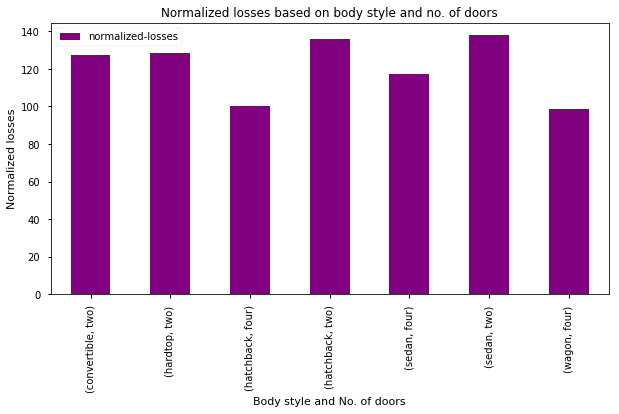

In [64]:

pd.pivot_table(automobile,index=['body-style','num-of-doors'], values='normalized-losses').plot(kind='bar',color='purple')
plt.title("Normalized losses based on body style and no. of doors")
plt.ylabel('Normalized losses')
plt.xlabel('Body style and No. of doors');


**Conclusion**

Analysis of the data set provides

1. How the data set are distributed

2. Correlation between different fields and how they are related

3. Normalized loss of the manufacturer takes many things into consideration among which no.of cars and body style is included, We can understand that 2-door cars has more number of losses than the 4 door cars. 

4. Symboling : Cars are initially assigned a risk factor symbol associated with its price

5. Mileage : Mileage based on City and Highway driving for various make and attributes

6. Price : Factors affecting Price of the Automobile.

Importance of drive wheels and curb weight